In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [2]:
clothes_data= pd.read_csv("/content/clothes_price_prediction_data.csv")
clothes_data.head()

,Brand,Category,Color,Size,Material,Price
0,New Balance,Dress,White,XS,Nylon,182
1,New Balance,Jeans,Black,XS,Silk,57
2,Under Armour,Dress,Red,M,Wool,127
3,Nike,Shoes,Green,M,Cotton,77
4,Adidas,Sweater,White,M,Nylon,113


In [3]:
clothes_data.isnull().sum()

Brand       0
Category    0
Color       0
Size        0
Material    0
Price       0
dtype: int64

In [4]:
columns= [x for x in clothes_data.columns]
val= [clothes_data[i].value_counts() for i in columns]
print(val)


[Brand
Under Armour    179
Puma            168
Adidas          166
Nike            165
New Balance     164
Reebok          158
Name: count, dtype: int64, Category
Jacket     191
Shoes      172
Jeans      167
Dress      166
Sweater    160
T-shirt    144
Name: count, dtype: int64, Color
Yellow    173
White     171
Red       168
Black     163
Blue      163
Green     162
Name: count, dtype: int64, Size
XS     196
XXL    173
XL     167
S      166
M      157
L      141
Name: count, dtype: int64, Material
Polyester    175
Silk         173
Wool         172
Denim        163
Cotton       162
Nylon        155
Name: count, dtype: int64, Price
97     12
143    10
138    10
171     9
127     9
       ..
55      2
25      2
186     1
140     1
65      1
Name: count, Length: 190, dtype: int64]


##Splitting the Data into Features and Target Variable

In [5]:
X= clothes_data.drop(["Price"],axis=1)
Y= clothes_data["Price"]
X.head(2)

,Brand,Category,Color,Size,Material
0,New Balance,Dress,White,XS,Nylon
1,New Balance,Jeans,Black,XS,Silk


##Using Label Encoder

In [6]:
encoder= LabelEncoder()
for i in X.columns:
  X[i]= encoder.fit_transform(X[i])
X.head(2)

,Brand,Category,Color,Size,Material
0,1,0,4,4,2
1,1,2,0,4,4


##Splitting into Train and Test

In [7]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.33, random_state=42)
print(Xtrain.shape)
print(Ytrain.shape)
print(Xtest.shape)
print(Ytest.shape)

(670, 5)
(670,)
(330, 5)
(330,)


##Finding the best parameter to Train the Model

In [8]:
param_grid= {'alpha': range(0,100,5)}
grid_search = GridSearchCV(estimator= Ridge(),param_grid=param_grid,cv=20,scoring='neg_mean_squared_error')
grid_search.fit(Xtrain, Ytrain)

best_alpha = grid_search.best_params_['alpha']
print(f"Best alpha: {best_alpha}")

Best alpha: 95


##Model Performance

In [9]:
model= Ridge(alpha= best_alpha)
model.fit(Xtrain,Ytrain)
y_pred= model.predict(Xtest)
test_mse = mean_squared_error(Ytest, y_pred)
print("Log Scaled RMSE: ",np.sqrt(test_mse))

Log Scaled RMSE:  54.550233521511124


**The error is quite high. So, data transformation needs to be performed and check if that can reduce the error and improve the model performance.**

##Feature Selection

Text(0.5, 1.0, 'Impact of Each Feature on Price Variation')

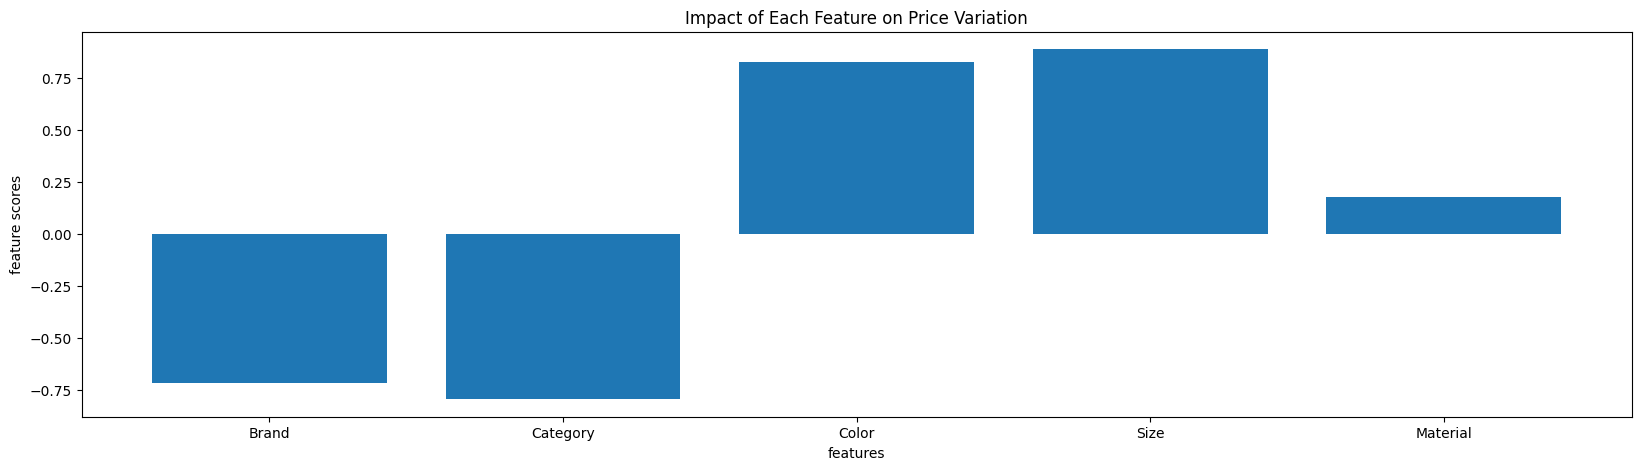

In [10]:
feature= []
feature_score=[]
reg_model = LinearRegression()
reg_model.fit(X,Y)
coef= reg_model.coef_
for val,index in enumerate(X.columns):
  # print(index,": ",coef[val])
  feature.append(index)
  feature_score.append(coef[val])
plt.figure(figsize= (20,5))
plt.bar(feature,feature_score)
plt.xlabel("features")
plt.ylabel("feature scores")
plt.title("Impact of Each Feature on Price Variation")


**The features Brand and Category has negative impact on the price variation. Therefore, they need to be removed and only the features with positive scores are kept.**

##Removing the Features having Negative Feature Scores

In [11]:
X= X.drop(['Brand','Category'],axis=1)
X.head()

,Color,Size,Material
0,4,4,2
1,0,4,4
2,3,1,5
3,2,1,0
4,4,1,2


##Splitting the Updated Data into Train and Test

In [12]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.33, random_state=42)
print(Xtrain.shape)
print(Ytrain.shape)
print(Xtest.shape)
print(Ytest.shape)

(670, 3)
(670,)
(330, 3)
(330,)


###Data Transformation

In [13]:
log_Ytrain = np.log(Ytrain)
log_Ytest = np.log(Ytest)

##Finding the best Parameter for the Updated Training Data

In [14]:
param_grid= {'alpha': range(0,100,5)}
grid_search = GridSearchCV(estimator= Ridge(),param_grid=param_grid,cv=20,scoring='neg_mean_squared_error')
grid_search.fit(Xtrain, log_Ytrain)

best_alpha = grid_search.best_params_['alpha']
print(f"Best alpha: {best_alpha}")

Best alpha: 95


##Model Performance in Predicting Prices from Test Data

In [15]:
model= Ridge(alpha= best_alpha)
model.fit(Xtrain,log_Ytrain)
y_pred_log= model.predict(Xtest)
test_mse_log = mean_squared_error(log_Ytest, y_pred_log)
print("Log Scaled RMSE: ",np.sqrt(test_mse_log))

Log Scaled RMSE:  0.7170891444718097


**Assessing the model performance using Root Mean Squared Error. The RMSE value has drastically decreased. This shows that there is a significant improvement in the model performance to predict clothes prices.**